<a href="https://colab.research.google.com/github/sahil1239/Parameter-Optimization-of-SVM-/blob/main/Parameter_Optimization_of_SVM_%0C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("/content/drive/MyDrive/data.csv")

In [13]:
accuracy = []
params = []
max_accuracy = 0

In [14]:
x = df.drop('class', axis = 1)
y = df['class']
x = StandardScaler().fit_transform(x)

In [ ]:
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
  param_grid = { 
                'C':[0.1, 1, 2, 3, 5],
                'kernel':['rbf', 'sigmoid', 'linear', 'poly'],
                'gamma': [0.1, 1, 2, 3, 5]
              }
  grid = GridSearchCV(SVC(max_iter=1000), param_grid, refit = True)
  grid.fit(x_train, y_train)
  y_pred = grid.predict(x_test)
  temp = accuracy_score(y_test, y_pred)
  accuracy.append(temp)
  params.append(grid.best_params_)
  if temp > max_accuracy:
    max_accuracy = temp
    best_estimator = grid.best_estimator_
    x_max_train, y_max_train = x_train, y_train
    x_max_test, y_max_test = x_test, y_test


In [17]:
table = pd.DataFrame(columns=['Sample', 'Accuracy', 'parameters'])
table['Sample'] = [x+1 for x in range(10)]
table['Accuracy'] = accuracy
table['parameters'] = params
table

,Sample,Accuracy,parameters
0,1,0.984160,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}"
1,2,0.988292,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}"
2,3,0.984160,"{'C': 3, 'gamma': 1, 'kernel': 'rbf'}"
3,4,0.977961,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}"
4,5,0.980716,"{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}"
5,6,0.987603,"{'C': 3, 'gamma': 1, 'kernel': 'rbf'}"
6,7,0.984848,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}"
7,8,0.989669,"{'C': 3, 'gamma': 1, 'kernel': 'rbf'}"
8,9,0.988981,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}"
9,10,0.983471,"{'C': 5, 'gamma': 1, 'kernel': 'rbf'}"


In [25]:
train_sizes, train_scores, test_scores = learning_curve(best_estimator, x_max_train, y_max_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 40))

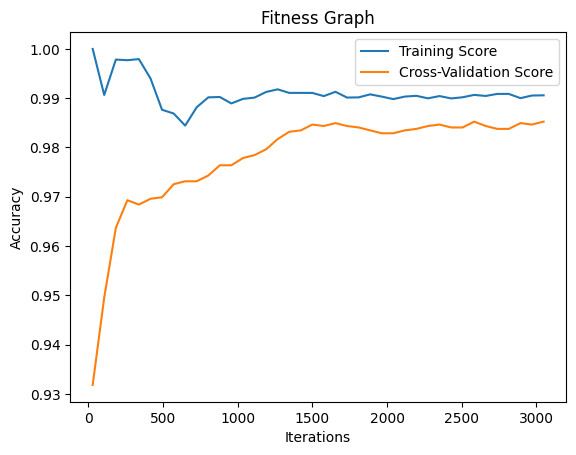

In [26]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Fitness Graph')
plt.legend(loc="best")
plt.show()